In [1]:
#mtech.columns

# https://www.kaggle.com/osmi/mental-health-in-tech-survey


# * family_history - Do you have a family history of mental illness?
# * treatment - Have you sought treatment for a mental health condition?
# * work_interfere - If you have a mental health condition, do you feel that it interferes with your work?
# * remote_work - Do you work remotely (outside of an office) at least 50% of the time?
# * tech_company - Is your employer primarily a tech company/organization?
# * benefits - Does your employer provide mental health benefits?
# * care_options - Do you know the options for mental health care your employer provides?
# * wellness_program - Has your employer ever discussed mental health as part of an employee wellness program?
# * seek_help - Does your employer provide resources to learn more about mental health issues and how to seek help?
# * anonymity - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
# * leave - How easy is it for you to take medical leave for a mental health condition?
# * mental_health_consequence - Do you think that discussing a mental health issue with your employer would have negative consequences?
# * phys_health_consequence - Do you think that discussing a physical health issue with your employer would have negative consequences?
# * coworkers - Would you be willing to discuss a mental health issue with your coworkers?
# * supervisor - Would you be willing to discuss a mental health issue with your direct supervisor(s)?
# * mental_health_interview - Would you bring up a mental health issue with a potential employer in an interview?
# * phys_health_interview - Would you bring up a physical health issue with a potential employer in an interview?
# * mental_vs_physical - Do you feel that your employer takes mental health as seriously as physical health?
# * obs_consequence - Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

In [4]:
# Basic Libraries
!pip install mlxtend
!pip install graphviz
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import seaborn as sb
sb.set() # set the default Seaborn style for graphics

from pandas import DataFrame, Series

from scipy import stats
from scipy.stats import randint

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz




# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
from mlxtend.classifier import StackingClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

!pip install ipyleaflet
!jupyter nbextension enable --py --sys-prefix ipyleaflet
!pip install geocoder

import geocoder
import ipyleaflet
from ipyleaflet import Map, FullScreenControl

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


In [31]:
mentalhealthData = pd.read_csv('mental.csv')
mentalhealthData.head()

,Timestamp,total_num,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27/8/2014 11:29,1,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27/8/2014 11:29,1,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27/8/2014 11:29,1,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27/8/2014 11:29,1,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27/8/2014 11:30,1,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [32]:
mentalhealthData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 28 columns):
Timestamp                    1259 non-null object
total_num                    1259 non-null int64
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null obje

In [33]:
#dealing with missing data
#Let’s get rid of the variables "Timestamp",“comments”, “state” just to make our lives easier.
mentalhealthData = mentalhealthData.drop(['comments'], axis= 1)
mentalhealthData = mentalhealthData.drop(['state'], axis= 1)
mentalhealthData = mentalhealthData.drop(['Timestamp'], axis= 1)

mentalhealthData.isnull().sum().max() #just checking that there's no missing data missing...
mentalhealthData.head(5)

,total_num,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1,37,Female,United States,NaN,No,Yes,Often,Jun-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,1,32,Male,Canada,NaN,No,No,Rarely,Jun-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,1,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,1,31,Male,United States,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [34]:
mentalhealthData.describe()

,total_num,Age
count,1259.0,1.259000e+03
mean,1.0,7.942815e+07
std,0.0,2.818299e+09
min,1.0,-1.726000e+03
25%,1.0,2.700000e+01
50%,1.0,3.100000e+01
75%,1.0,3.600000e+01
max,1.0,1.000000e+11


In [35]:
mentalhealthData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
total_num                    1259 non-null int64
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null object
mental_health_consequence    1259 non-null obj

In [36]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in mentalhealthData:
    if feature in intFeatures:
        mentalhealthData[feature] = mentalhealthData[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        mentalhealthData[feature] = mentalhealthData[feature].fillna(defaultString)
    elif feature in floatFeatures:
        mentalhealthData[feature] = mentalhealthData[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
mentalhealthData.head(5)   

Error: Feature total_num not recognized.


,total_num,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1,37,Female,United States,NaN,No,Yes,Often,Jun-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,1,32,Male,Canada,NaN,No,No,Rarely,Jun-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,1,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,1,31,Male,United States,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [37]:
#clean 'Gender'
#Slower case all columm's elements
gender = mentalhealthData['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = mentalhealthData['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in mentalhealthData.iterrows():

    if str.lower(col.Gender) in male_str:
        mentalhealthData['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        mentalhealthData['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        mentalhealthData['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
mentalhealthData = mentalhealthData[~mentalhealthData['Gender'].isin(stk_list)]

print(mentalhealthData
      ['Gender'].unique())

['female' 'male' 'trans']


In [38]:
#complete missing age with mean
mentalhealthData['Age'].fillna(mentalhealthData['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(mentalhealthData['Age'])
s[s<18] = mentalhealthData['Age'].median()
mentalhealthData['Age'] = s
s = pd.Series(mentalhealthData['Age'])
s[s>120] = mentalhealthData['Age'].median()
mentalhealthData['Age'] = s

#Ranges of Age
mentalhealthData['age_range'] = pd.cut(mentalhealthData['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)



In [39]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
mentalhealthData['self_employed'] = mentalhealthData['self_employed'].replace([defaultString], 'No')
print(mentalhealthData['self_employed'].unique())

['No' 'Yes']


In [40]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

mentalhealthData['work_interfere'] = mentalhealthData['work_interfere'].replace([defaultString], 'Don\'t know' )
print(mentalhealthData['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [41]:
print("Data type : ", type(mentalhealthData))
print("Data dims : ", mentalhealthData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1257, 26)


In [42]:
print(mentalhealthData.dtypes)

total_num                       int64
Age                             int64
Gender                         object
Country                        object
self_employed                  object
family_history                 object
treatment                      object
work_interfere                 object
no_employees                   object
remote_work                    object
tech_company                   object
benefits                       object
care_options                   object
wellness_program               object
seek_help                      object
anonymity                      object
leave                          object
mental_health_consequence      object
phys_health_consequence        object
coworkers                      object
supervisor                     object
mental_health_interview        object
phys_health_interview          object
mental_vs_physical             object
obs_consequence                object
age_range                    category
dtype: objec

In [43]:
print('Age Group with the highest number of mental health cases:',mentalhealthData['Age'].value_counts().index[0])
print('Gender with the highest number of mental health cases:',mentalhealthData['Gender'].value_counts().index[0])
print('Countries with the highest number of mental health cases:',mentalhealthData['Country'].value_counts().index[0])

Age Group with the highest number of mental health cases: 29
Gender with the highest number of mental health cases: male
Countries with the highest number of mental health cases: United States


Age groups : 45
29    85
32    82
26    75
31    73
27    71
33    70
28    68
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
46    12
45    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
54     3
57     3
47     2
60     2
61     1
62     1
65     1
58     1
53     1
72     1
Name: Age, dtype: int64


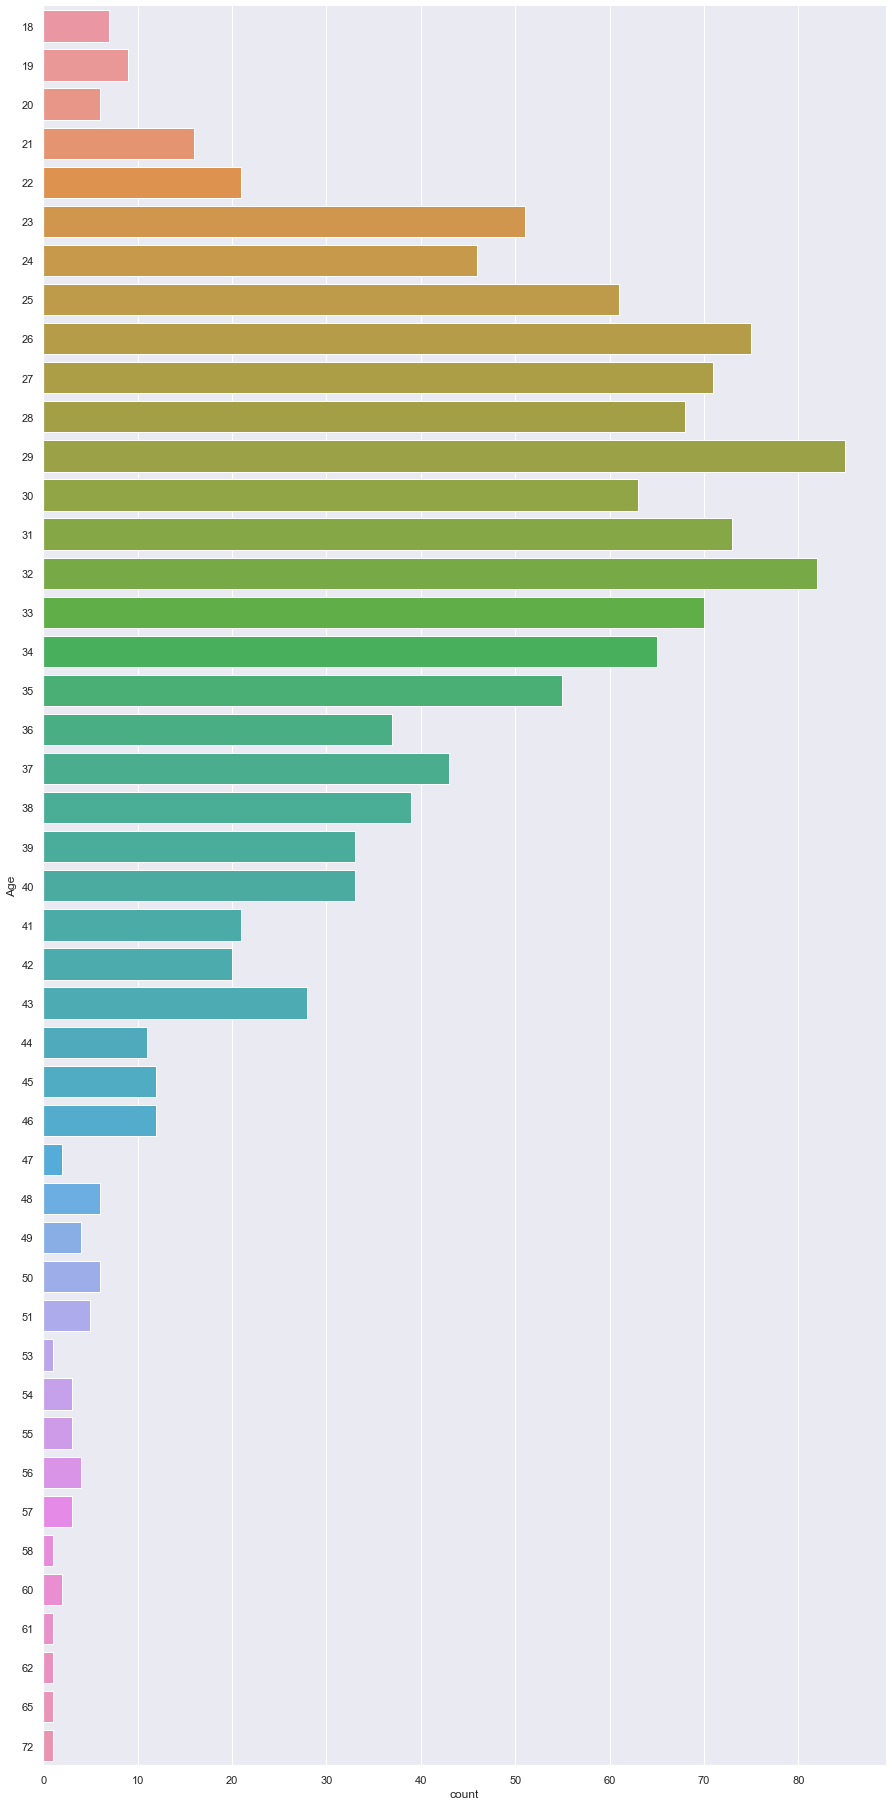

In [44]:
# Number of mental health cases between age groups
print("Age groups :", len(mentalhealthData["Age"].unique()))

# Gender
print(mentalhealthData["Age"].value_counts())
sb.catplot(y = "Age", data = mentalhealthData, kind = "count", height=25, aspect=0.5)

# We can infer that ages between 21 to 35 has the most mental health cases

Gender : 3
male      991
female    247
trans      19
Name: Gender, dtype: int64


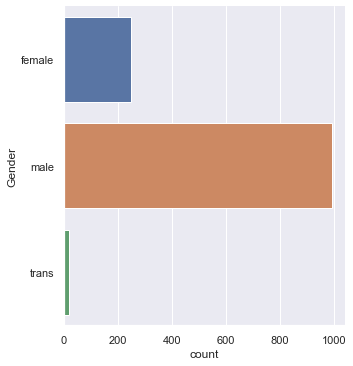

In [45]:
# Number of mental health cases between genders
print("Gender :", len(mentalhealthData["Gender"].unique()))

# Gender
print(mentalhealthData["Gender"].value_counts())
sb.catplot(y = "Gender", data = mentalhealthData, kind = "count")

# We can infer that nearly 80% of mental health cases are male

Countries : 47
United States             750
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Sweden                      7
Poland                      7
Italy                       7
Belgium                     6
Brazil                      6
South Africa                6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Austria                     3
Russia                      3
Finland                     3
Portugal                    2
Colombia                    2
Croatia                     2
Greece                      2
Denmark                     2
Hungary                     1
Czech Republic              1
Moldova                     1
Georgia                  

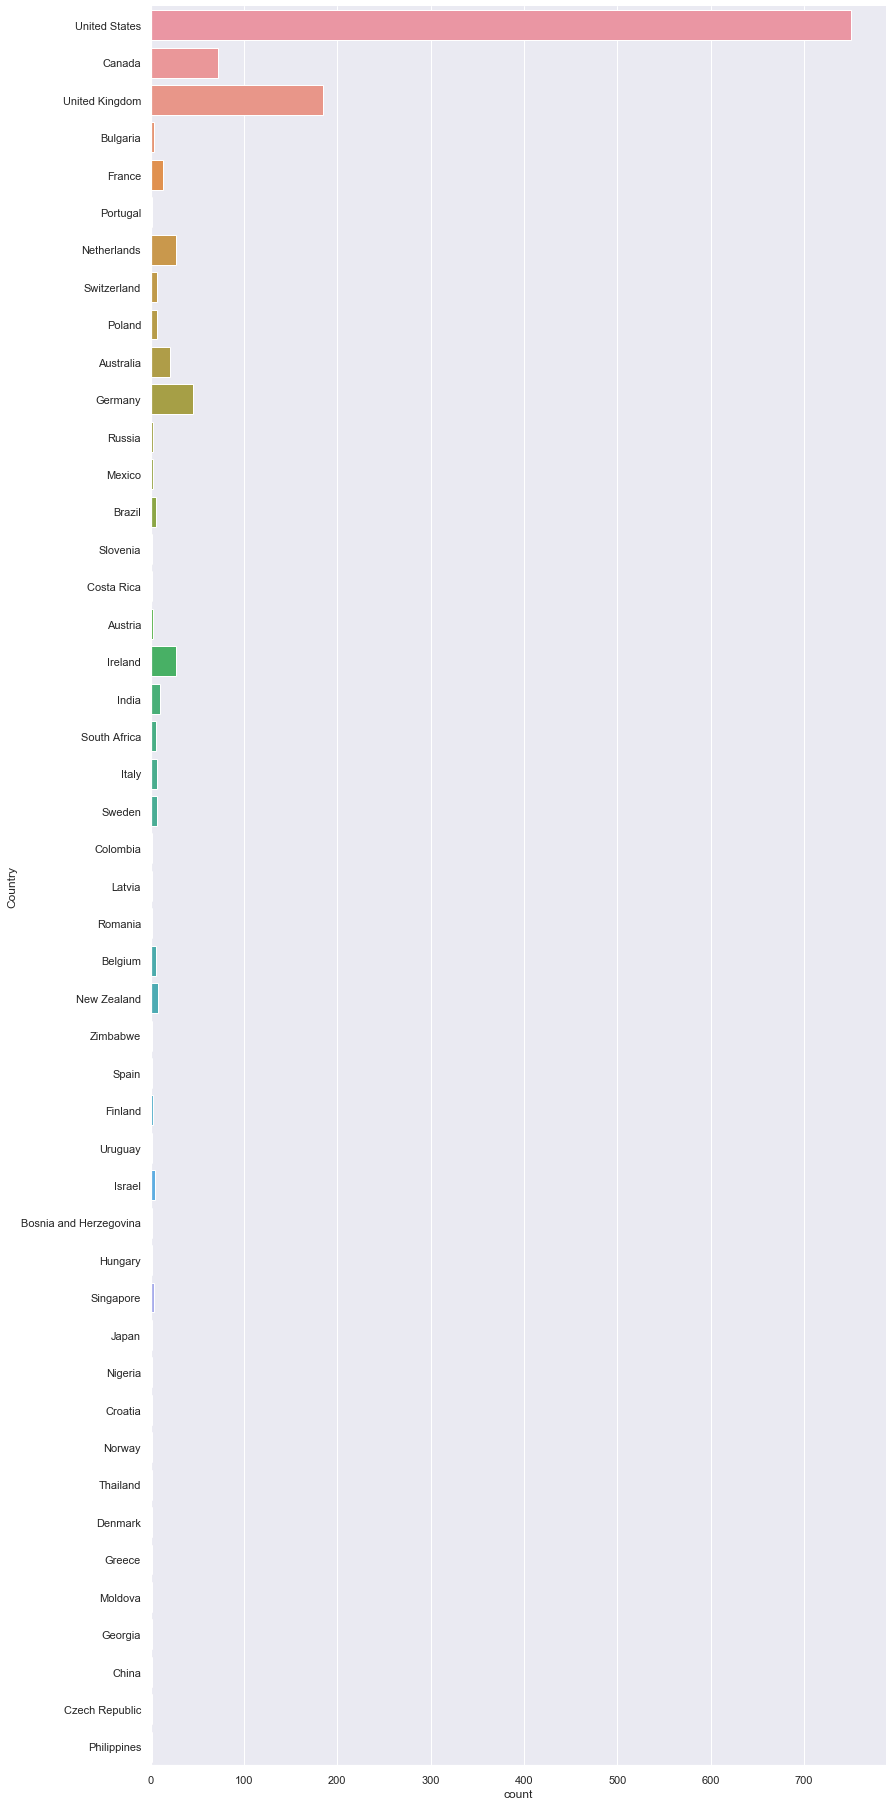

In [46]:
# Number of mental health cases between countries
print("Countries :", len(mentalhealthData["Country"].unique()))

# Gender
print(mentalhealthData["Country"].value_counts())
sb.catplot(y = "Country", data = mentalhealthData, kind = "count", height=25, aspect=0.5)

# We can infer that united states has nearly 65% of mental health cases

In [21]:
# get location data for Countries (latitude and longitude)
UK = geocoder.osm('GBR')
US = geocoder.osm('USA')
Canada = geocoder.osm('CAN')
Germany = geocoder.osm('DEU')
Ireland = geocoder.osm('IRL')
Netherlands = geocoder.osm('NLD')
Australia = geocoder.osm('AUS')
France = geocoder.osm('FRA')
India = geocoder.osm('IND')
NZ = geocoder.osm('NZL')

# intensity for heat map
# intensity is population scaled up so heat dots are more readable
UK_latlng = [UK.lat, UK.lng, 185*100]
US_latlng = [US.lat, US.lng, 750*100]
Canada_latlng = [Canada.lat, Canada.lng, 72*100]
Germany_latlng = [Germany.lat, Germany.lng, 45*100]
Ireland_latlng = [Ireland.lat, Ireland.lng, 27*100]
Netherlands_latlng = [Netherlands.lat, Netherlands.lng, 27*100]
Australia_latlng = [Australia.lat, Australia.lng,21*100]
India_latlng = [India.lat, India.lng, 10*100]
France_latlng = [France.lat,France.lng,13*100]
NZ_latlng = [NZ.lat, NZ.lng, 8*100]

# create list of countries
large_countries = [UK_latlng, US_latlng, Canada_latlng, Germany_latlng, Ireland_latlng, Netherlands_latlng, Australia_latlng, France_latlng, India_latlng, NZ_latlng]

# create map
world_heatmap = Map( zoom=0)

# create heatmap layer
heatmap_layer = ipyleaflet.Heatmap(locations=large_countries, radius=10, blur=5)

# create control
heatmap_full_screen_control = FullScreenControl()

# add heatmap layer to map
# add control to map
world_heatmap.add_layer(heatmap_layer)
world_heatmap.add_control(heatmap_full_screen_control)

# display map
world_heatmap

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

Types : 2
No     743
Yes    469
Name: family_history, dtype: int64


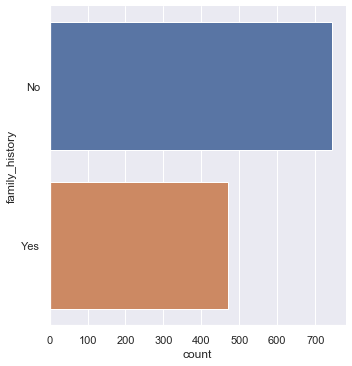

In [22]:
# Mental health cases who has family history
print("Types :", len(mentalhealthData["family_history"].unique()))

# Mental health cases who has family history
print(mentalhealthData["family_history"].value_counts())
sb.catplot(y = "family_history", data = mentalhealthData, kind = "count")

No     1076
Yes     136
Name: self_employed, dtype: int64


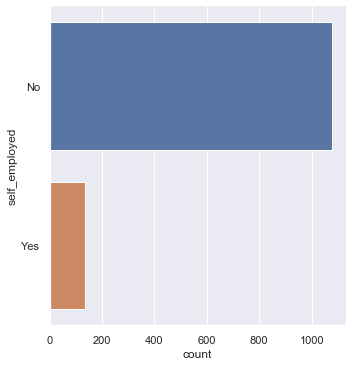

In [23]:
# Mental health cases who are Self-employed
print(mentalhealthData["self_employed"].value_counts())
sb.catplot(y = "self_employed", data = mentalhealthData, kind = "count")

# We can infer that 85% of the mental health cases are not self employed.

Types : 2
Yes    993
No     219
Name: tech_company, dtype: int64


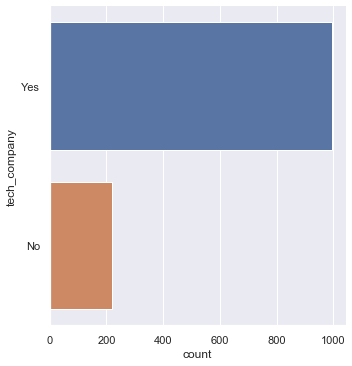

In [24]:
# Tech Companies
print("Types :", len(mentalhealthData["tech_company"].unique()))

# Tech Companies
print(mentalhealthData["tech_company"].value_counts())
sb.catplot(y = "tech_company", data = mentalhealthData, kind = "count")

# We can infer that 80% of the mental health cases works in the tech industry.

No            618
Don't know    356
Yes           238
Name: seek_help, dtype: int64


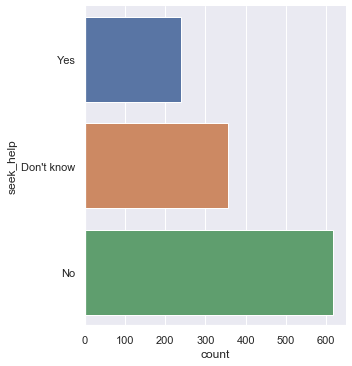

In [25]:
# Mental health cases who seek help
print(mentalhealthData["seek_help"].value_counts())
sb.catplot(y = "seek_help", data = mentalhealthData, kind = "count")

# We can infer that more than 50% of mental health patients do not seek help.

Sometimes     445
Don't know    256
Never         208
Rarely        168
Often         135
Name: work_interfere, dtype: int64


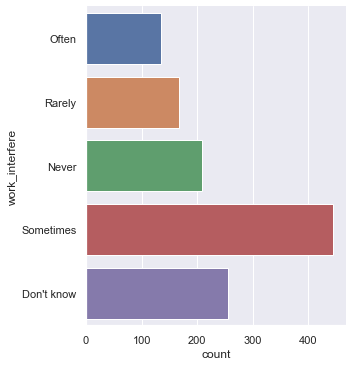

In [26]:
# Mental health cases whose work did interfere
print(mentalhealthData["work_interfere"].value_counts())
sb.catplot(y = "work_interfere", data = mentalhealthData, kind = "count")

Types : 6
6-25              280
26-100            276
More than 1000    273
100-500           169
1-5               155
500-1000           59
Name: no_employees, dtype: int64


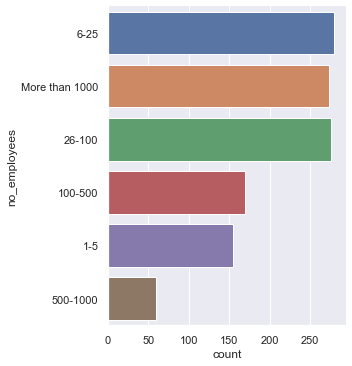

In [27]:
# Categories
print("Types :", len(mentalhealthData["no_employees"].unique()))

# No of employees in the companies
print(mentalhealthData["no_employees"].value_counts())
sb.catplot(y = "no_employees", data = mentalhealthData, kind = "count")

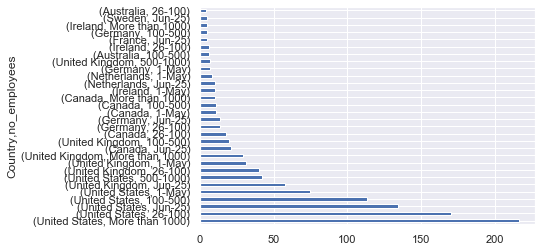

In [47]:
mentalhealthData.groupby(['Country','no_employees']).total_num.sum().nlargest(30).plot(kind='barh')

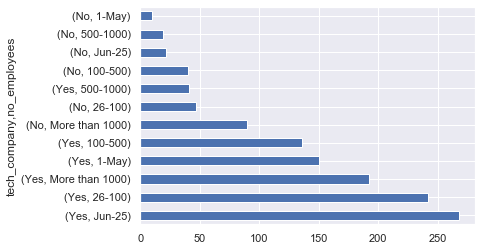

In [48]:
mentalhealthData.groupby(['tech_company','no_employees']).total_num.sum().nlargest(30).plot(kind='barh')

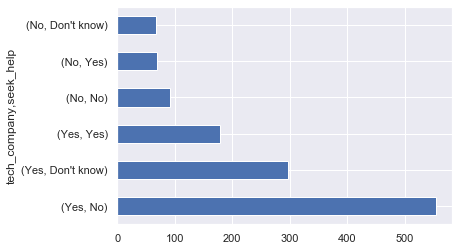

In [49]:
mentalhealthData.groupby(['tech_company','seek_help']).total_num.sum().nlargest(30).plot(kind='barh')

# We can infer that neary 50% of mental health patients who are in the tech industry do not seek help.

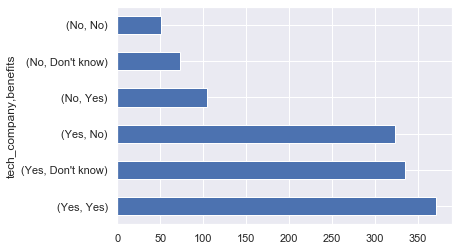

In [50]:
mentalhealthData.groupby(['tech_company','benefits']).total_num.sum().nlargest(30).plot(kind='barh')

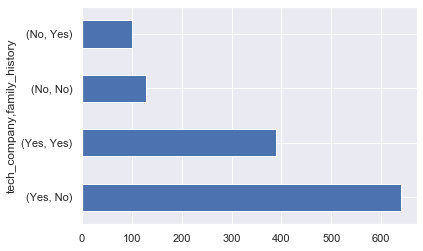

In [51]:
mentalhealthData.groupby(['tech_company','family_history']).total_num.sum().nlargest(30).plot(kind='barh')

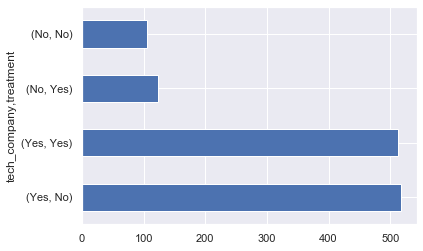

In [52]:
mentalhealthData.groupby(['tech_company','treatment']).total_num.sum().nlargest(30).plot(kind='barh')

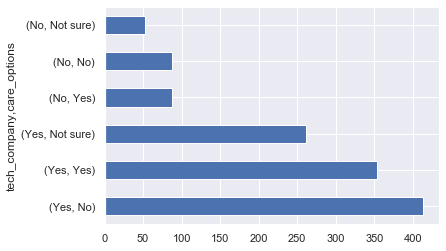

In [53]:
mentalhealthData.groupby(['tech_company','care_options']).total_num.sum().nlargest(30).plot(kind='barh')

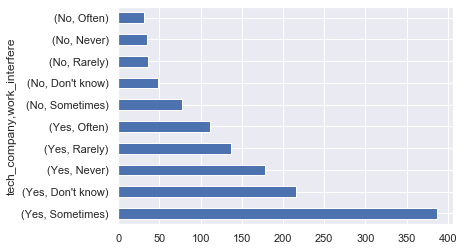

In [54]:
mentalhealthData.groupby(['tech_company','work_interfere']).total_num.sum().nlargest(30).plot(kind='barh')

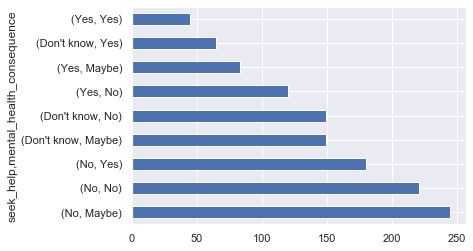

In [55]:
mentalhealthData.groupby(['seek_help','mental_health_consequence']).total_num.sum().nlargest(30).plot(kind='barh')

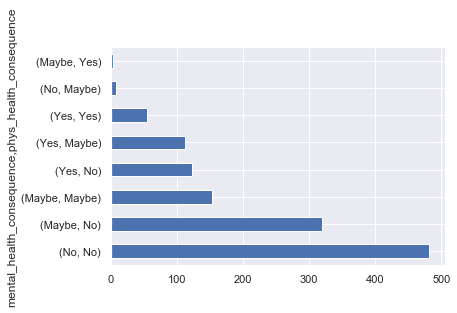

In [56]:
mentalhealthData.groupby(['mental_health_consequence', 'phys_health_consequence']).total_num.sum().nlargest(30).plot(kind='barh')

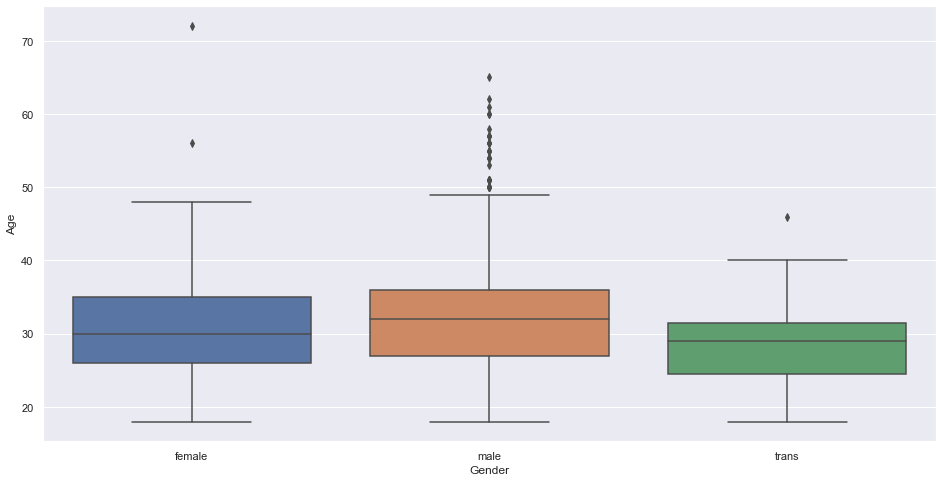

In [57]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Gender', y = 'Age', data = mentalhealthData)

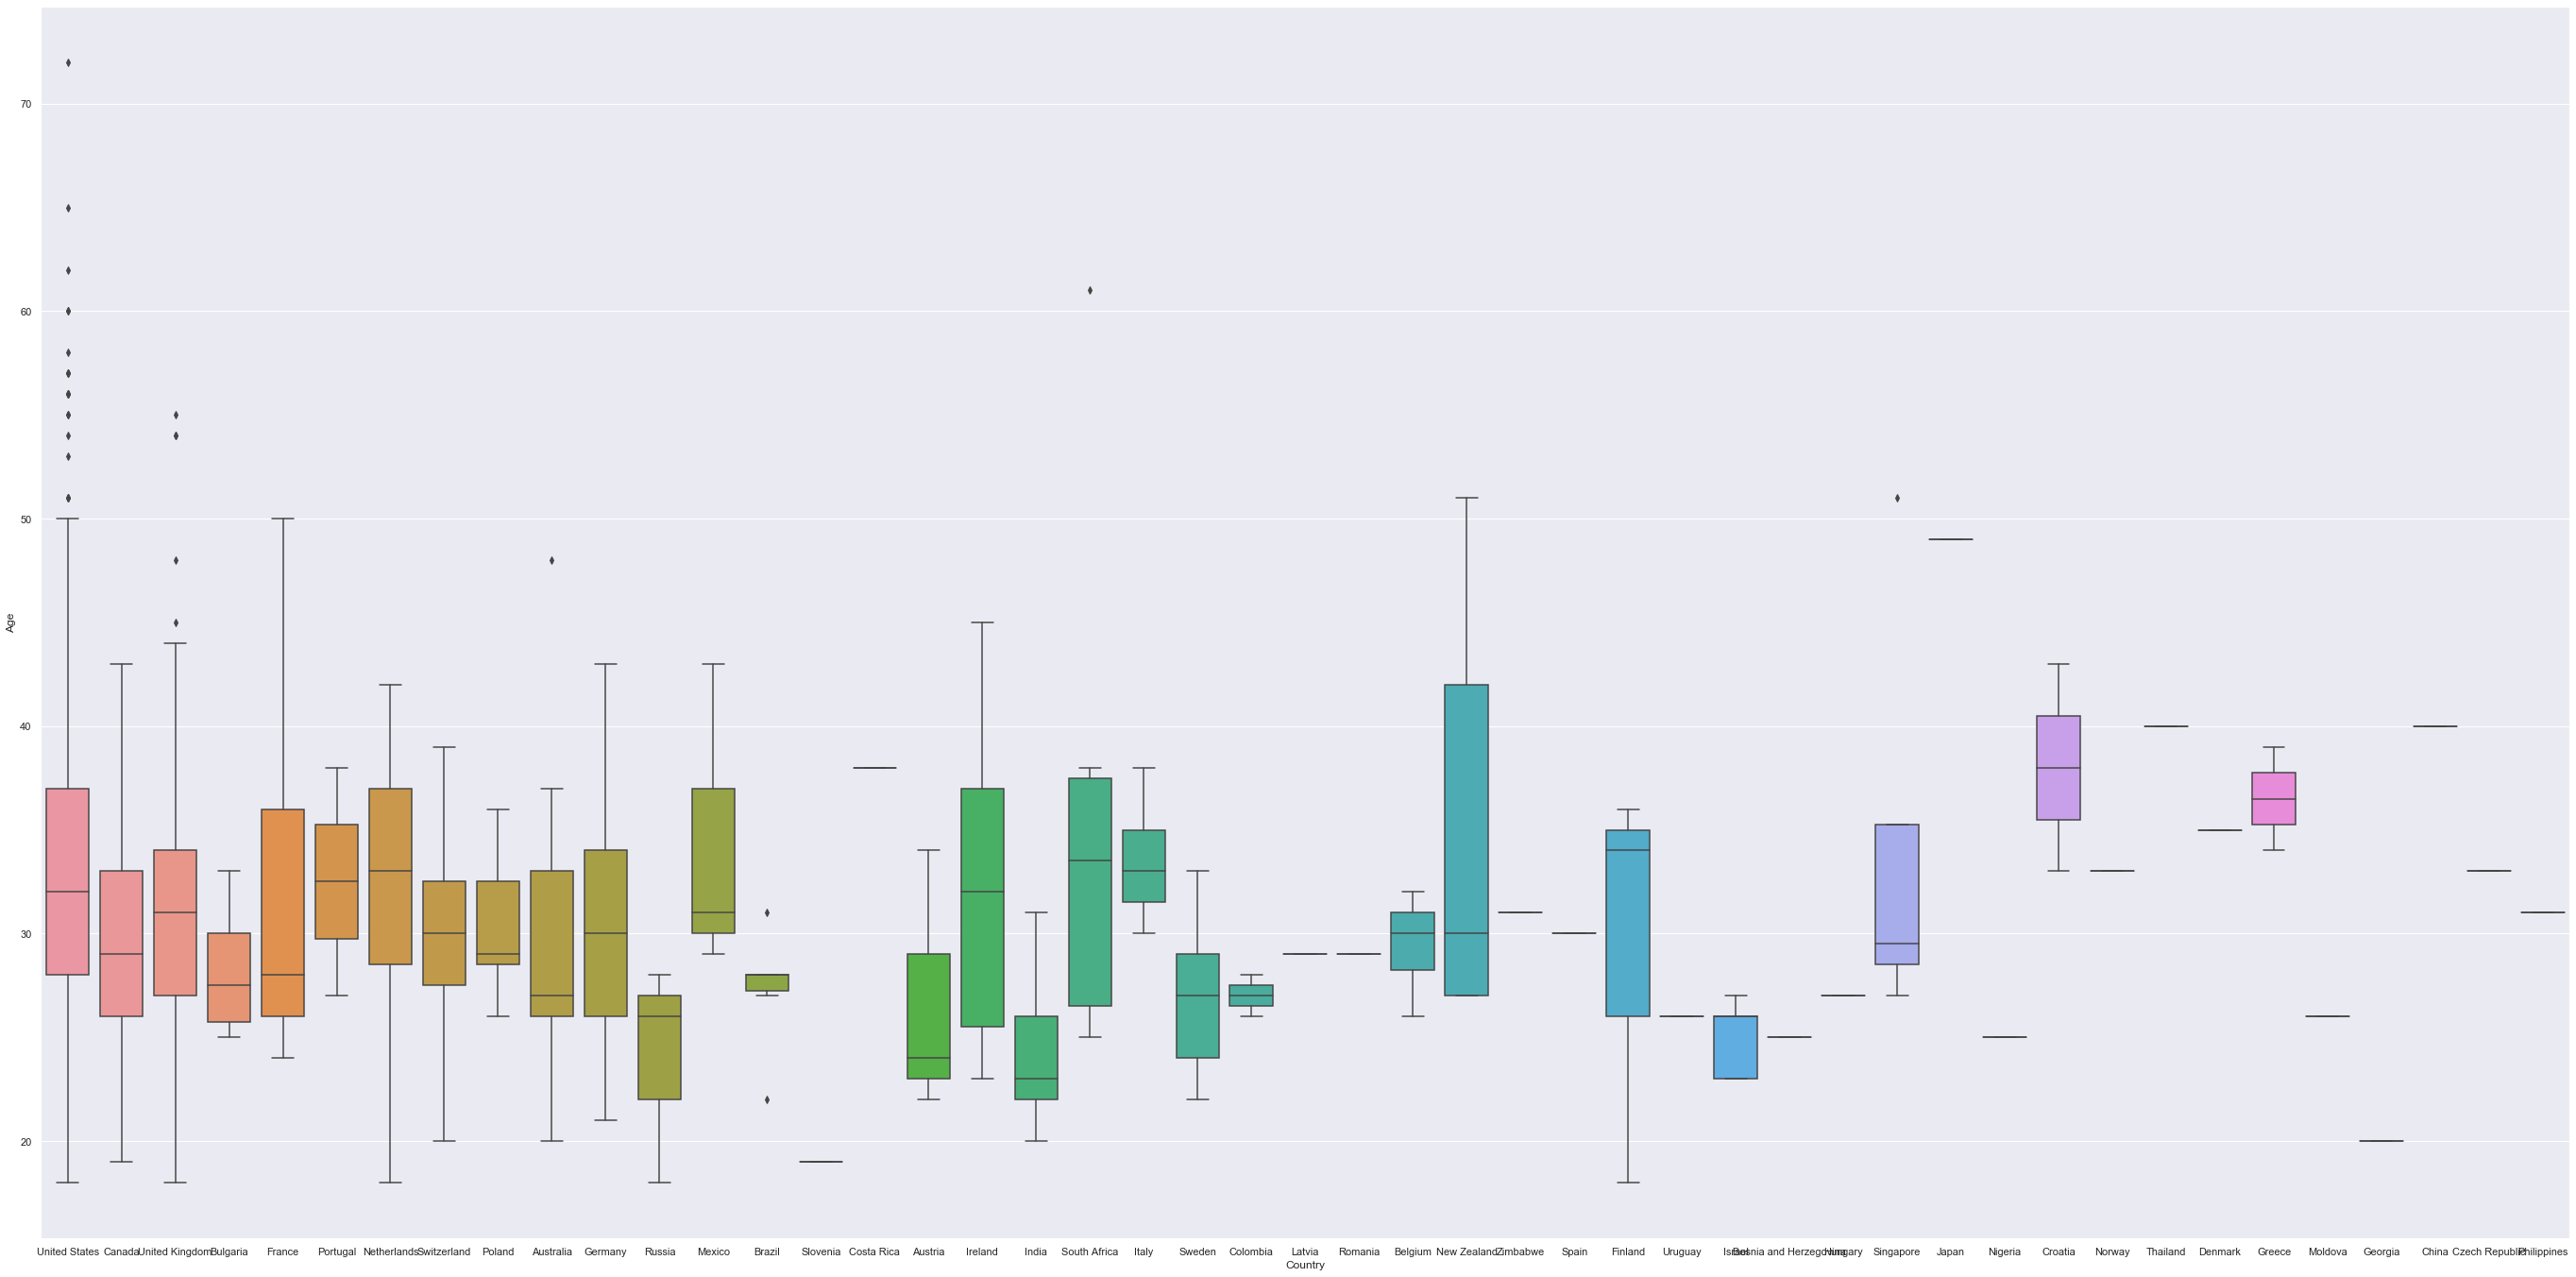

In [58]:
f, axes = plt.subplots(1, 1, figsize=(48,24))
sb.boxplot(x = 'Country', y = 'Age', data = mentalhealthData)

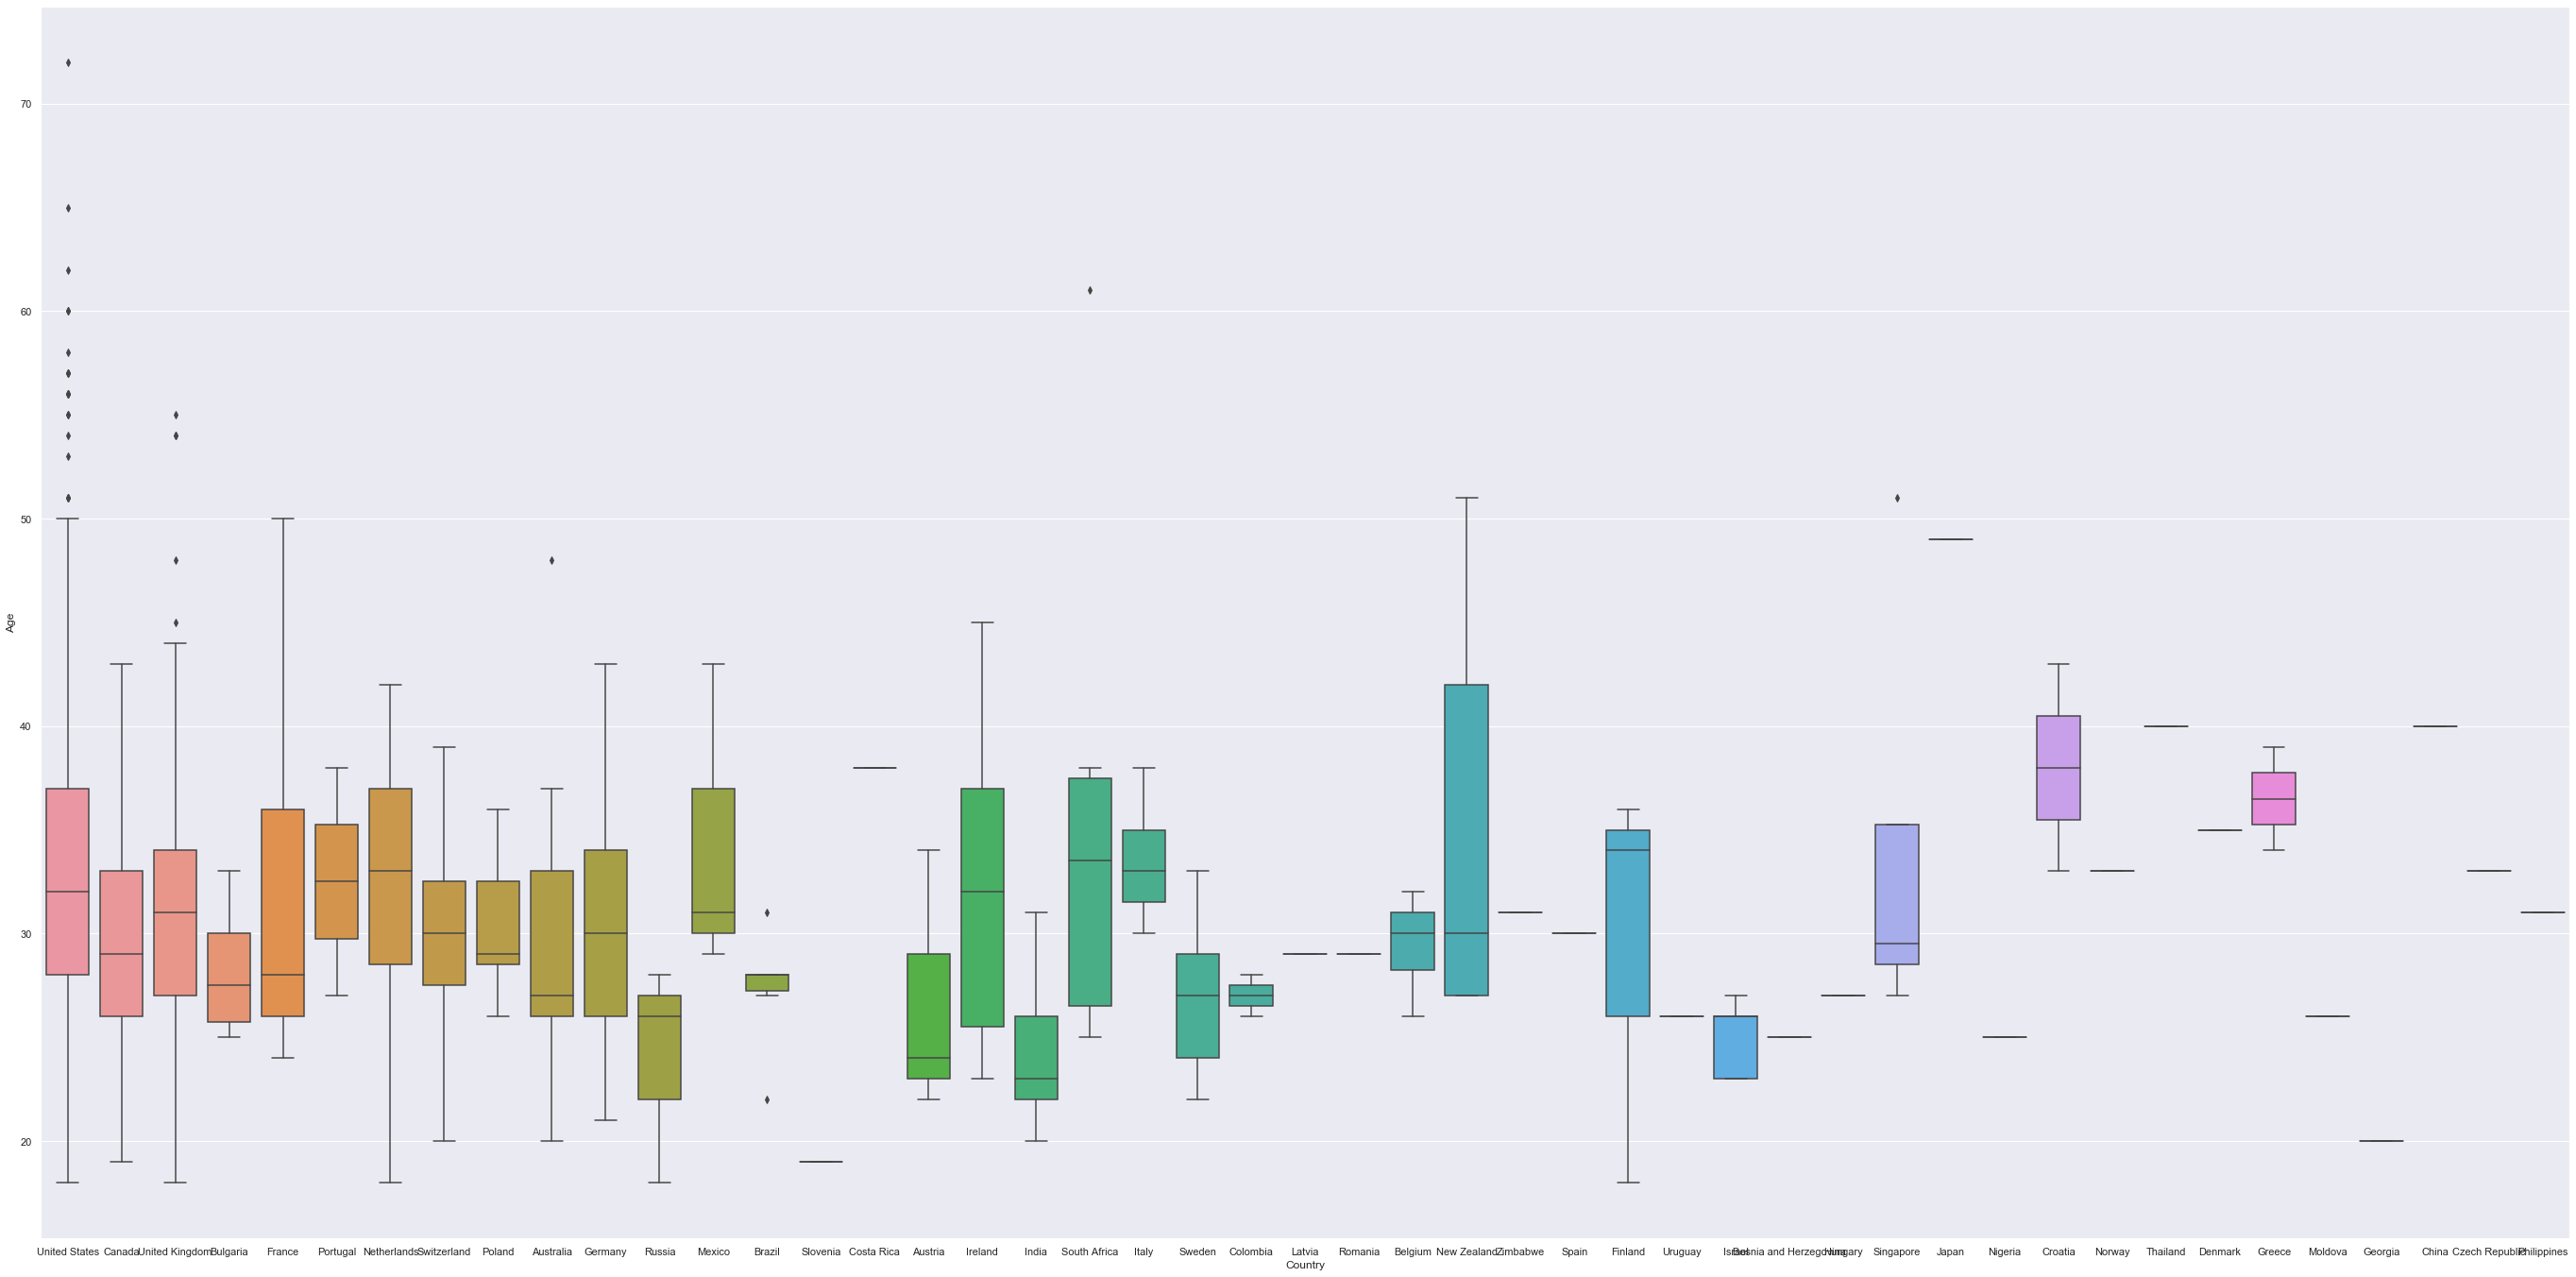

In [59]:
f, axes = plt.subplots(1, 1, figsize=(48,24))
sb.boxplot(x = 'Country', y = 'Age', data = mentalhealthData)

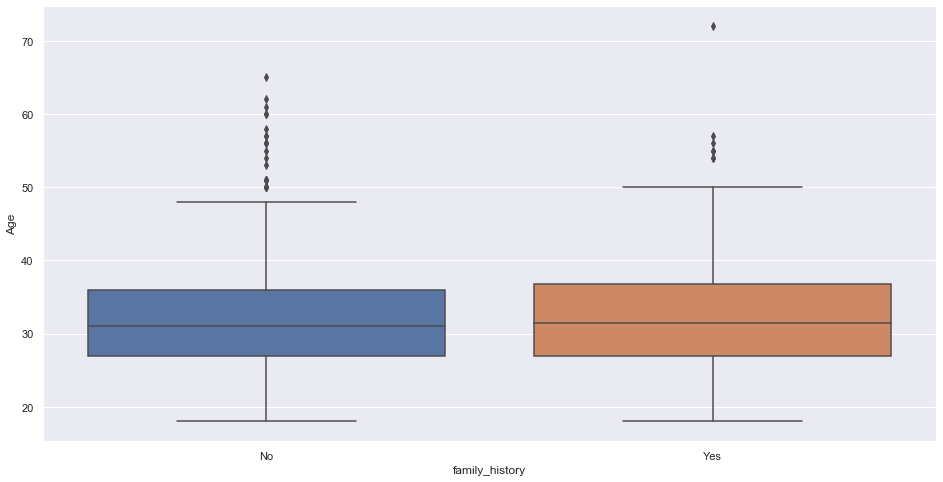

In [60]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
sb.boxplot(x = 'family_history', y = 'Age', data = mentalhealthData)

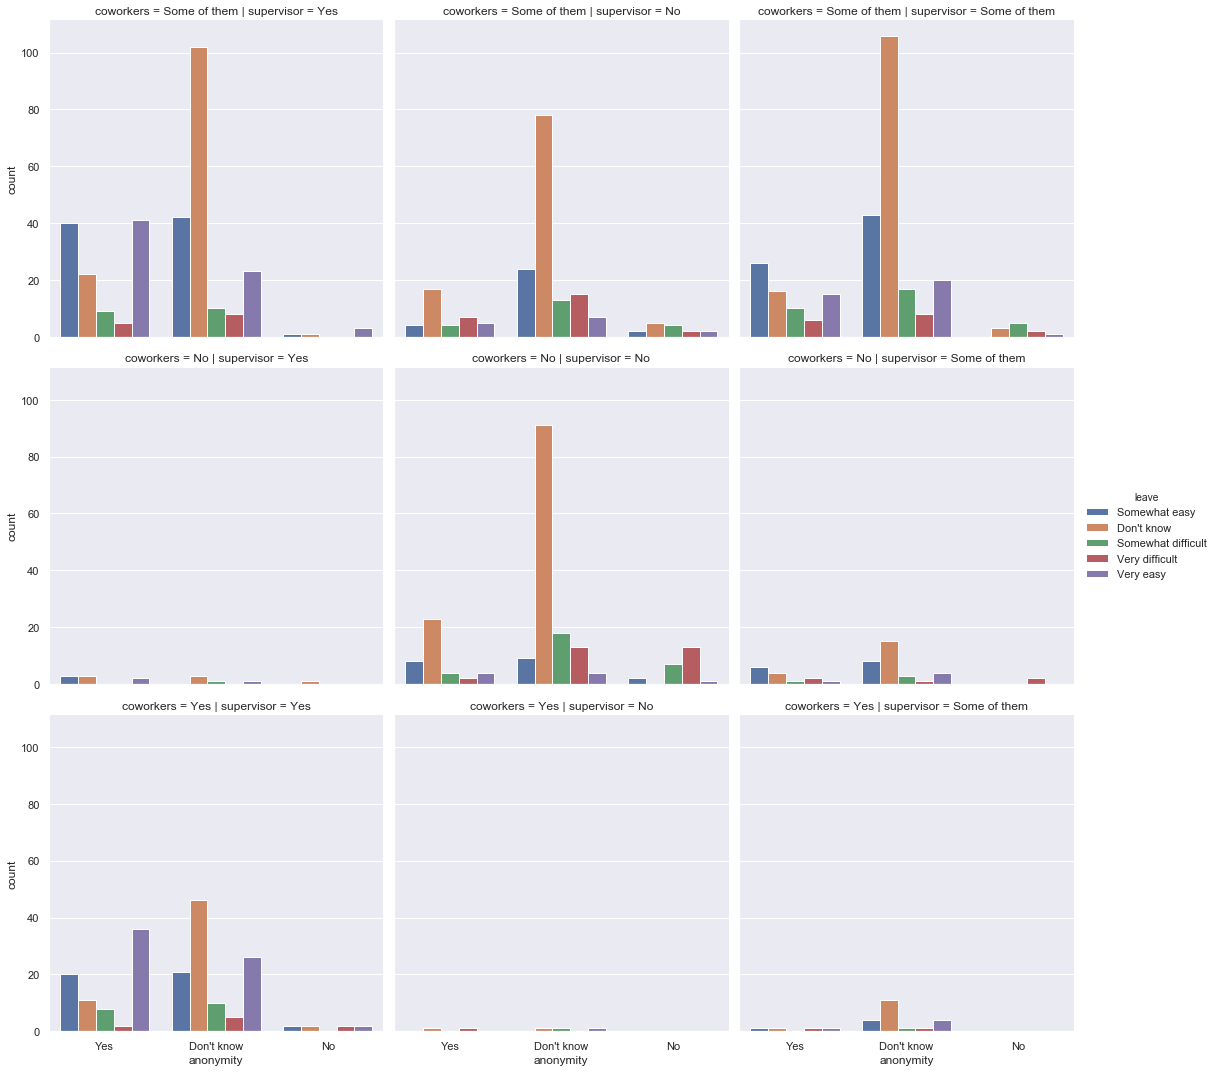

In [61]:
sb.catplot(x='anonymity', hue='leave', col='supervisor', row='coworkers', kind='count', data=mentalhealthData)

In [62]:
#anonymity - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
#leave - How easy is it for you to take medical leave for a mental health condition?
#coworkers - Would you be willing to discuss a mental health issue with your coworkers?
#supervisor - Would you be willing to discuss a mental health issue with your direct supervisor(s)?

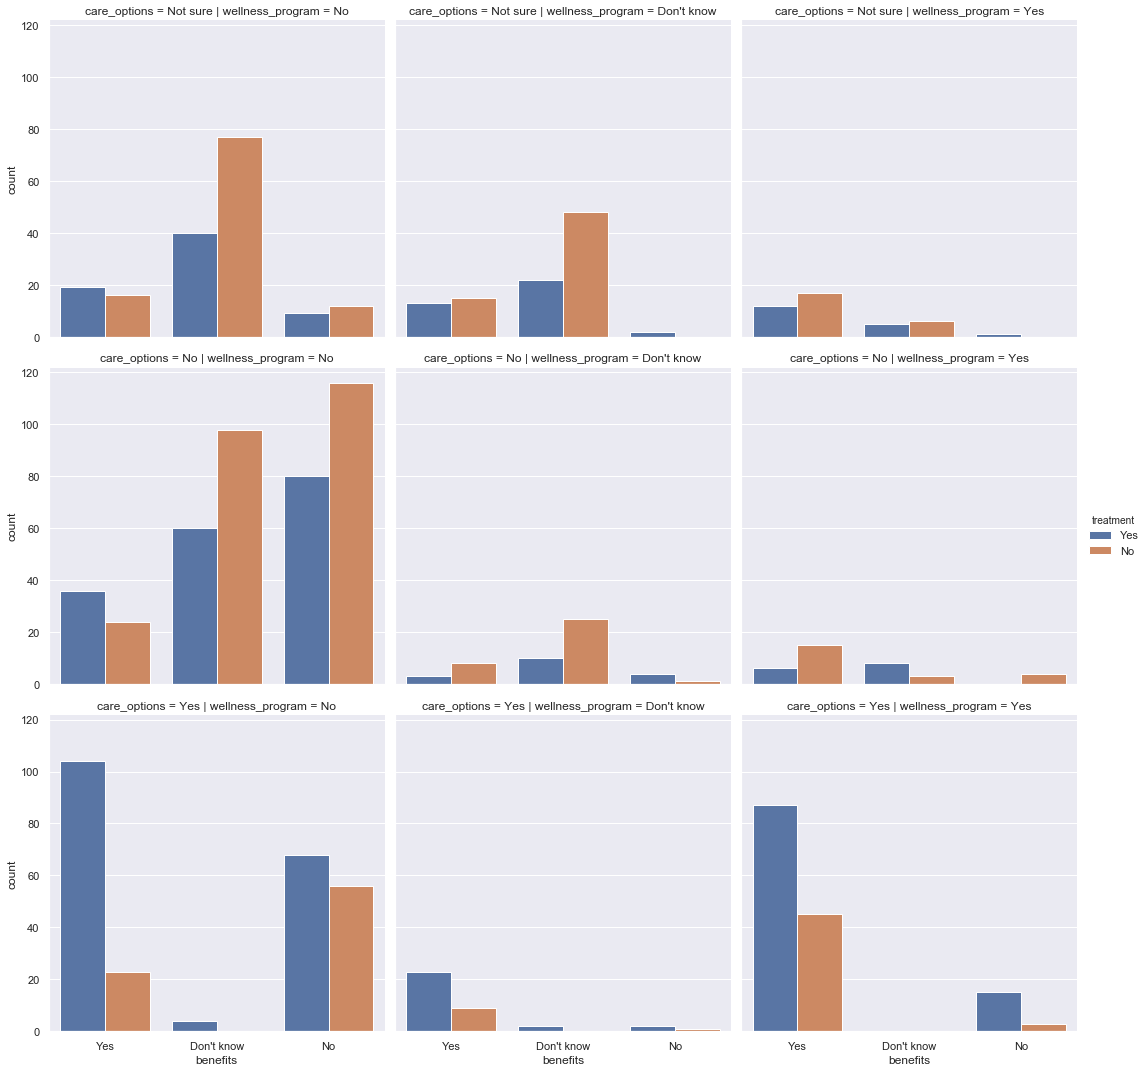

In [63]:
sb.catplot(x='benefits', hue='treatment', col='wellness_program', row='care_options',kind='count', data=mentalhealthData)

In [64]:
#treatment - Have you sought treatment for a mental health condition?
#benefits - Does your employer provide mental health benefits?
#care_options - Do you know the options for mental health care your employer provides?
#wellness_program - Has your employer ever discussed mental health as part of an employee wellness program?

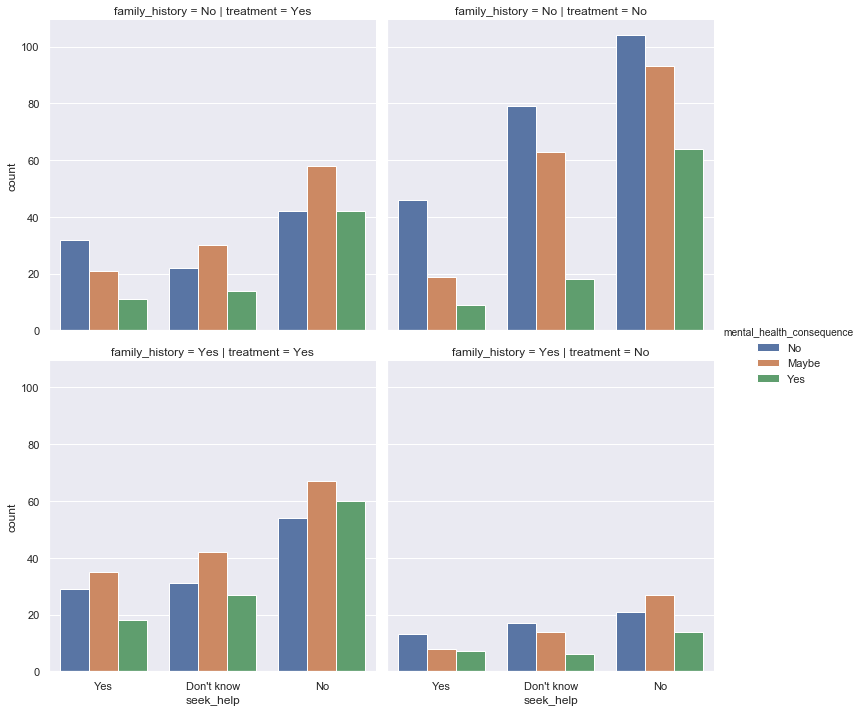

In [65]:
sb.catplot(x='seek_help', hue='mental_health_consequence', col='treatment', row='family_history', kind='count', data=mentalhealthData)

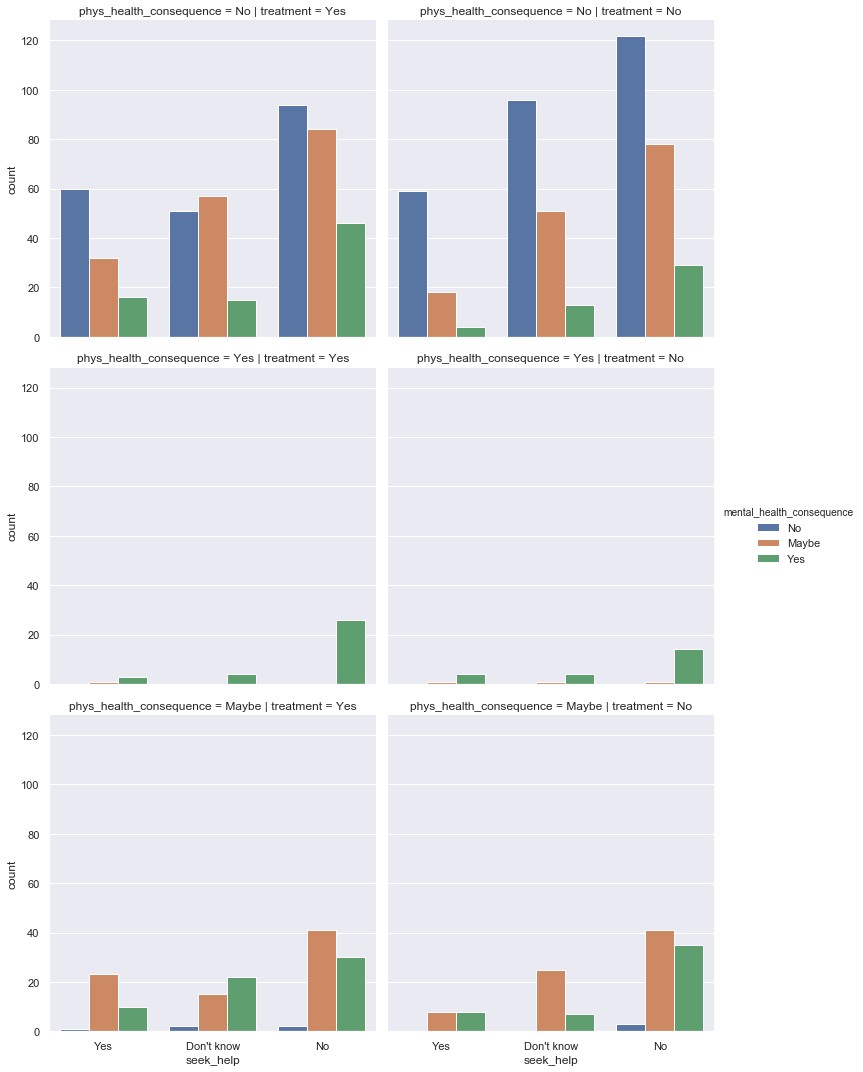

In [66]:
sb.catplot(x='seek_help', hue='mental_health_consequence', col='treatment', row='phys_health_consequence', kind='count', data=mentalhealthData)

In [67]:
TechCompany = pd.DataFrame(mentalhealthData['tech_company'])  # Response
Age = pd.DataFrame(mentalhealthData['Age'])      # Predictor

In [68]:
# Train Set : 600 samples
Age_train = pd.DataFrame(Age[:600])
TechCompany_train = pd.DataFrame(TechCompany[:600])

# Test Set : 200 samples
Age_test = pd.DataFrame(Age[-200:])
TechCompany_test = pd.DataFrame(TechCompany[-200:])

# Check the sample sizes
print("Train Set :", TechCompany_train.shape, Age_train.shape)
print("Test Set  :", TechCompany_test.shape, Age_test.shape)

Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


In [69]:
type(TechCompany_train["tech_company"])

pandas.core.series.Series

In [70]:
# Summary Statistics for Legendary Train
TechCompany_train["tech_company"].value_counts()

Yes    515
No      85
Name: tech_company, dtype: int64

In [71]:
# Summary Statistics for Age Train
Age_train.describe()

,Age
count,600.000000
mean,31.186667
std,7.179675
min,18.000000
25%,26.000000
50%,30.000000
75%,35.000000
max,65.000000


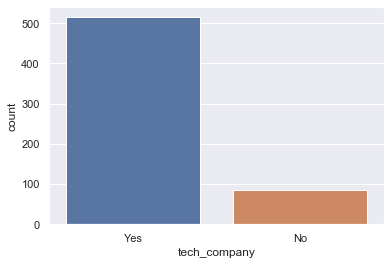

In [72]:
# Count Plot for TechCompany Train
sb.countplot(TechCompany_train["tech_company"])

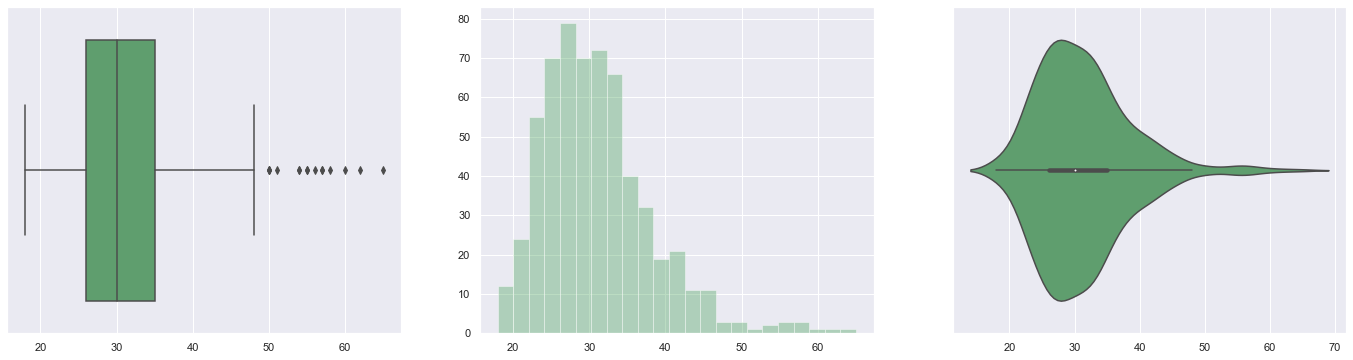

In [73]:
# Plot the distributions of Age Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(Age_train, orient = "h", ax = axes[0], color = "g")
sb.distplot(Age_train, kde = False, ax = axes[1], color = "g")
sb.violinplot(Age_train, ax = axes[2], color = "g")

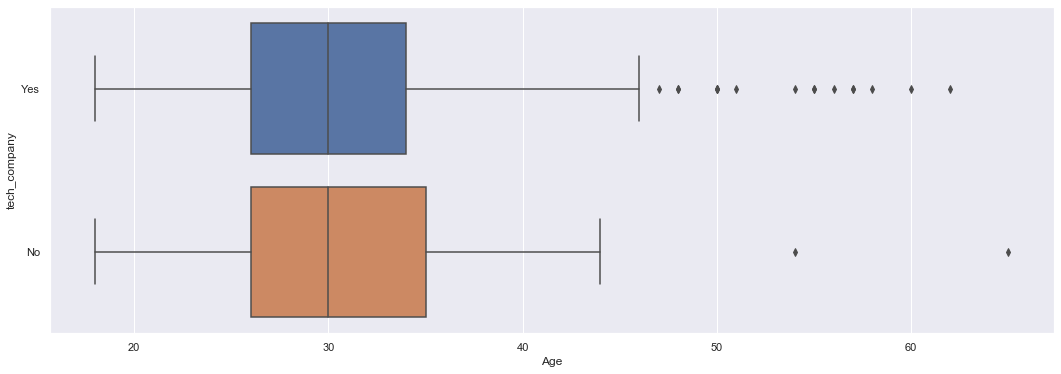

In [74]:
# Create a joint dataframe by concatenating Total and Legendary
jointDF = pd.concat([Age_train, TechCompany_train], axis = 1).reindex (Age_train.index)
# Joint Boxplot of Total Train against Legendary Train
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "Age", y = "tech_company", data = jointDF, orient = "h")

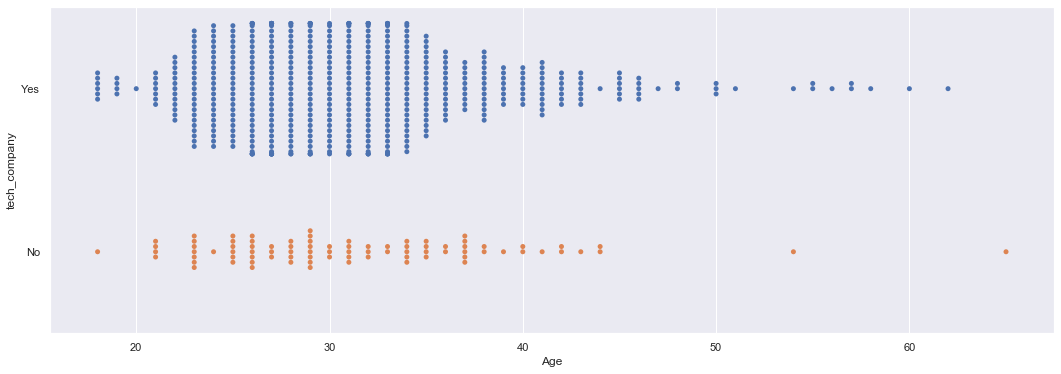

In [75]:
# Create a joint dataframe by concatenating Total and Legendary
jointDF = pd.concat([Age_train, TechCompany_train], axis = 1).reindex(Age_train.index)

# Joint Swarmplot of Total Train against Legendary Train
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "Age", y = "tech_company", data = jointDF, orient = "h")

In [76]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [77]:
# Train the Decision Tree Classifier model
dectree.fit(Age_train, TechCompany_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

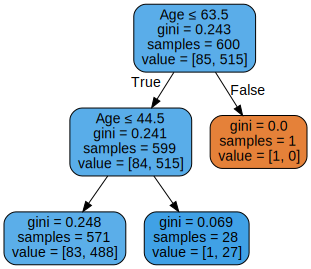

In [78]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = Age_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.86


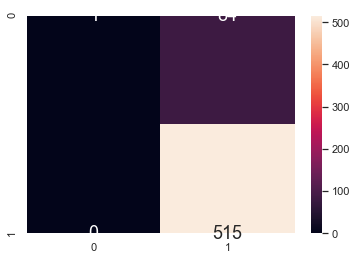

In [79]:
# Predict Legendary corresponding to Total Train
TechCompany_train_pred = dectree.predict(Age_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(Age_train, TechCompany_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(TechCompany_train, TechCompany_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.77


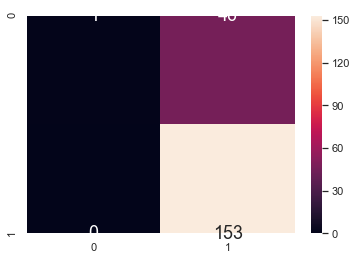

In [80]:
# Predict TechCompany corresponding to Age Test
TechCompany_test_pred = dectree.predict(Age_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(Age_test, TechCompany_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(TechCompany_test, TechCompany_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8227176220806794

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8126984126984127



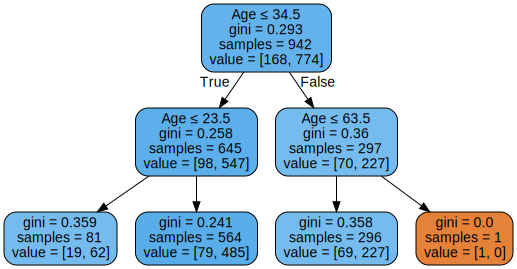

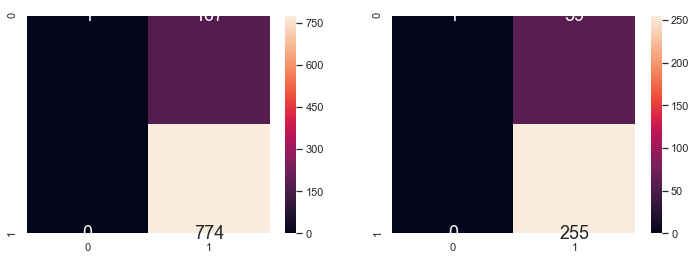

In [81]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Recall the Legendary-Total Dataset
TechCompany = pd.DataFrame(mentalhealthData['tech_company'])   # Response
Age = pd.DataFrame(mentalhealthData['Age'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Age, TechCompany, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

In [82]:
#Encoding data
labelDict = {}
for feature in mentalhealthData:
    le = preprocessing.LabelEncoder()
    le.fit(mentalhealthData[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    mentalhealthData[feature] = le.transform(mentalhealthData[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
mentalhealthData = mentalhealthData.drop(['Country'], axis= 1)
mentalhealthData.head()

label_total_num [1]
label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Some

,total_num,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0,19,0,0,0,1,2,4,0,1,...,2,1,1,1,2,1,0,2,0,2
1,0,26,1,0,0,0,3,5,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0,14,1,0,0,0,3,4,0,1,...,1,1,1,2,2,2,2,1,0,2
3,0,13,1,0,1,1,2,2,0,1,...,1,2,2,1,0,0,0,1,1,2
4,0,13,1,0,0,0,1,1,1,1,...,0,1,1,1,2,2,2,0,0,2


In [83]:
#missing data
total = mentalhealthData.isnull().sum().sort_values(ascending=False)
percent = (mentalhealthData.isnull().sum()/mentalhealthData.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
age_range                      0      0.0
care_options                   0      0.0
Age                            0      0.0
Gender                         0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
wellness_program               0      0.0
obs_consequence                0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0      0.0
phys_health_interview          0  

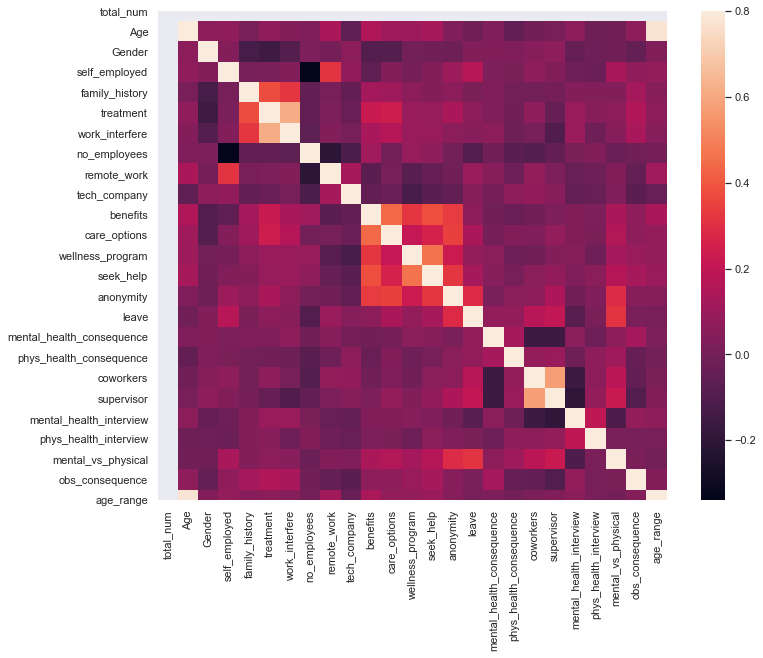

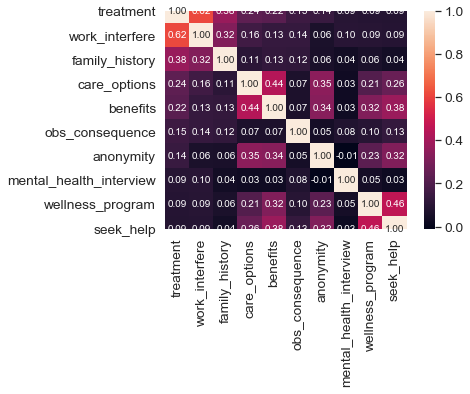

In [84]:
#correlation matrix
corrmat = mentalhealthData.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(mentalhealthData[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Text(0.5, 0, 'Age')

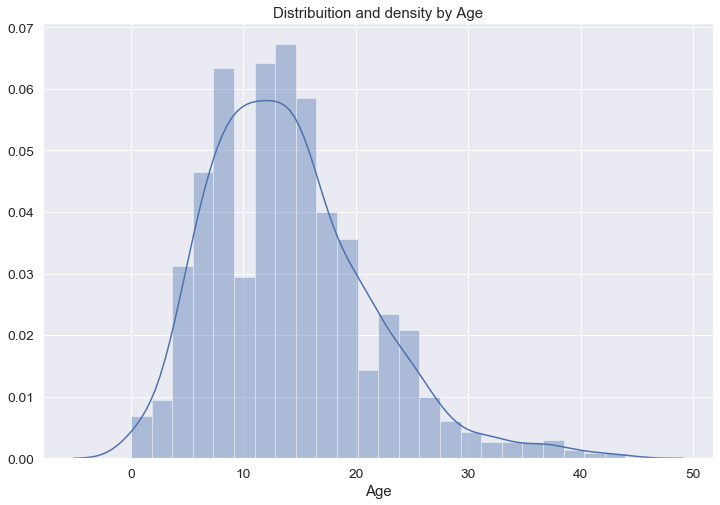

In [85]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
sb.distplot(mentalhealthData["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

C:\Users\augus\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\augus\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


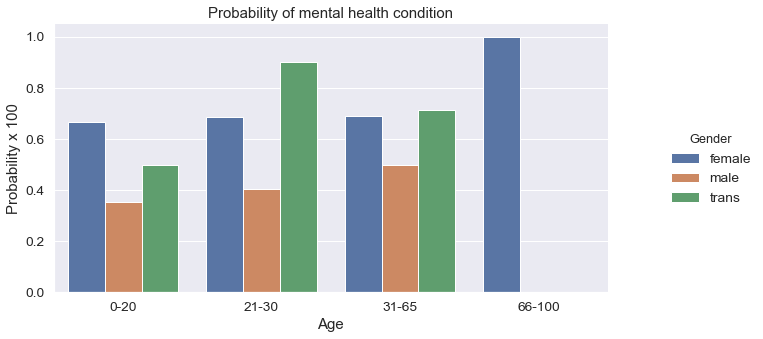

In [86]:
o = labelDict['label_age_range']

g = sb.factorplot(x="age_range", y="treatment", hue="Gender", data=mentalhealthData, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
# replace legend labels

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

In [87]:
# Extract Response and Predictors
y = pd.DataFrame(mentalhealthData["tech_company"]) 
X = pd.DataFrame(mentalhealthData[["Age", "work_interfere", "benefits", "treatment","family_history","care_options"]]) 

In [88]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (942, 1) (942, 6)
Test Set  : (315, 1) (315, 6)


In [89]:
# Summary Statistics for Response
y_train["tech_company"].value_counts()

1    762
0    180
Name: tech_company, dtype: int64

In [90]:
# Summary Statistics for Predictors
X_train.describe()

,Age,work_interfere,benefits,treatment,family_history,care_options
count,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000
mean,13.839703,2.238854,1.064756,0.490446,0.391720,0.963907
std,7.148552,1.587430,0.831787,0.500174,0.488394,0.866653
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,18.000000,4.000000,2.000000,1.000000,1.000000,2.000000
max,44.000000,4.000000,2.000000,1.000000,1.000000,2.000000


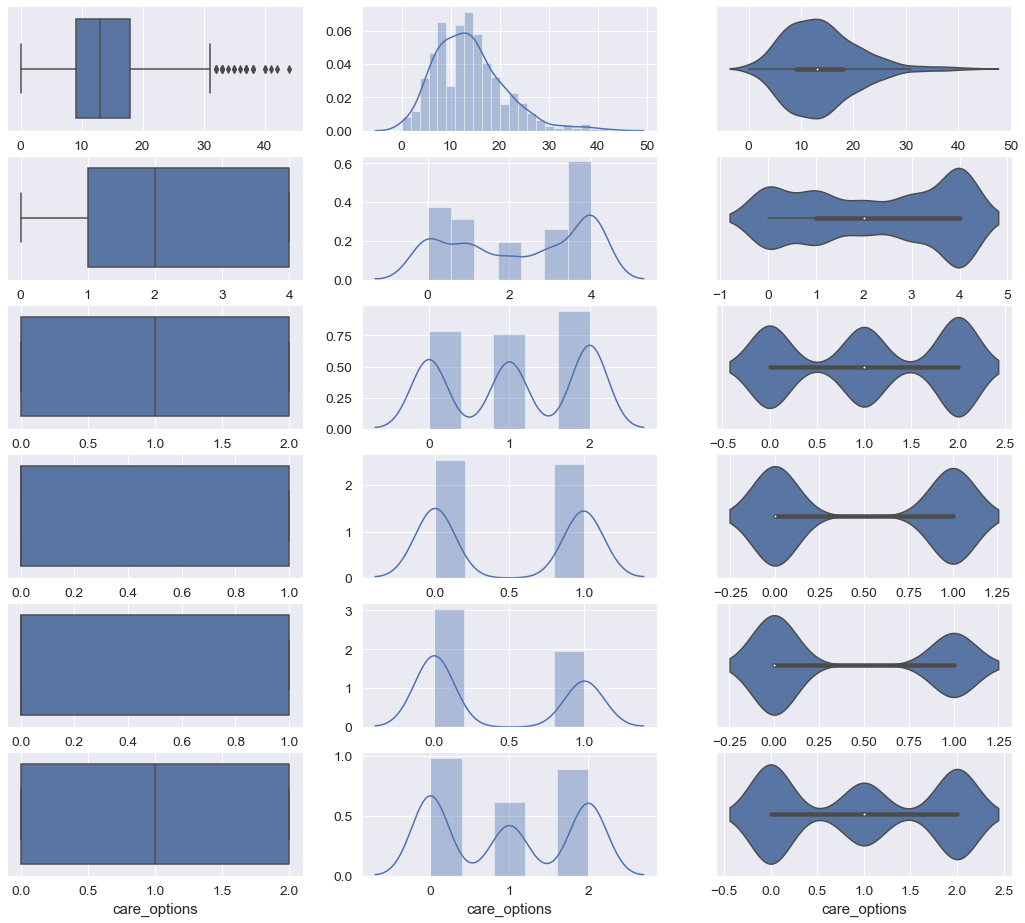

In [91]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(6, 3, figsize=(18, 16))

count = 0
for var in X_train:
    sb.boxplot(X_train[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_train[var], ax = axes[count,1])
    sb.violinplot(X_train[var], ax = axes[count,2])
    count += 1

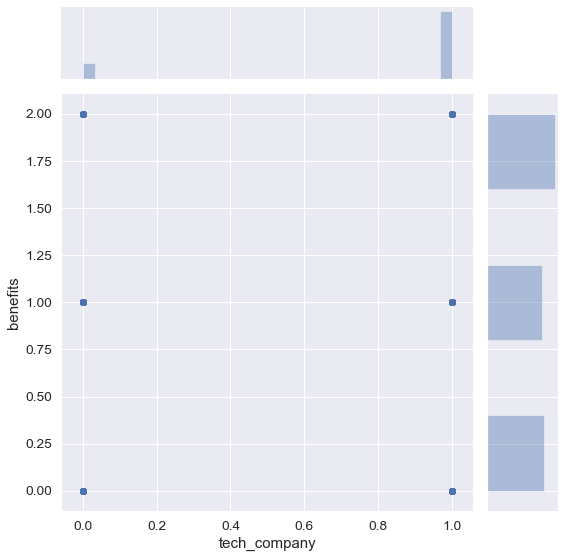

In [93]:
sb.jointplot(x = y_train['tech_company'], y = X_train['benefits'], height = 8)

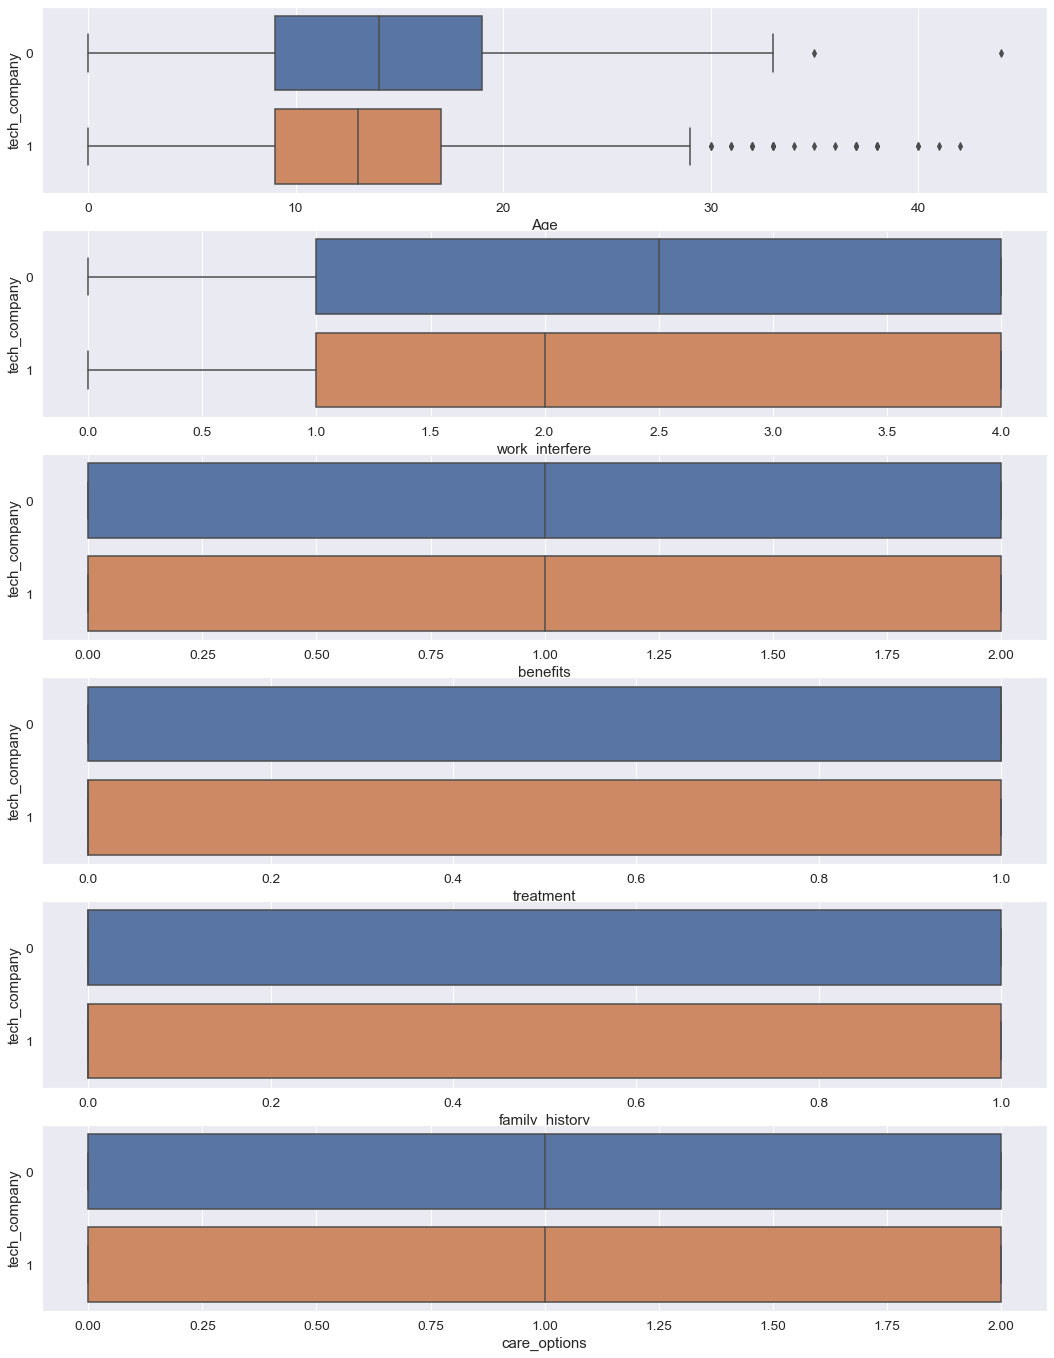

In [94]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(6, 1, figsize=(18, 24))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "tech_company", data = trainDF, orient = "h", ax = axes[count])
    count += 1

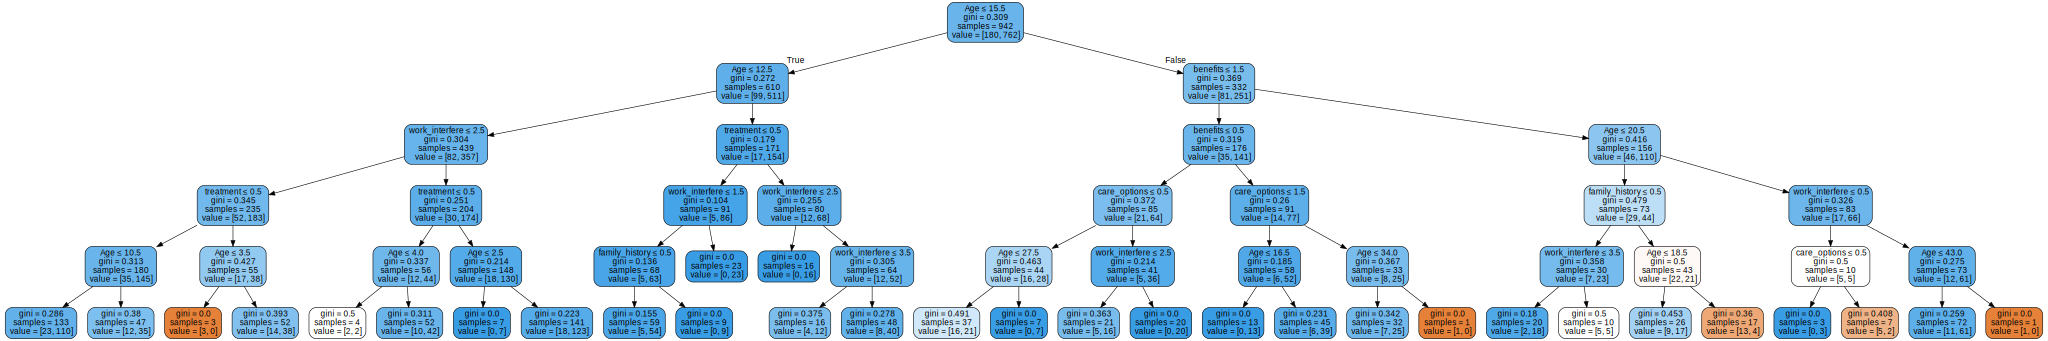

In [97]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8089171974522293

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8476190476190476



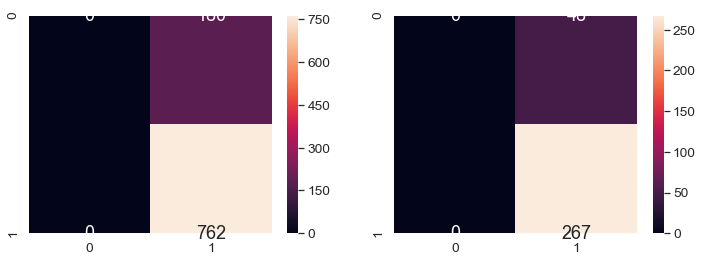

In [96]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])